In [8]:
!pip install pystan pycaret ipywidgets


In [13]:
!pip install pystan


In [14]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/Dhaval/opt/miniconda3/envs/ml/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zg/_8zwnwhj5s5c40cp02y3yg0r0000gn/T/pip-install-ohisu4ls/fbprophet_f242db96d5e942268dc5307c1fb1653f/setup.py'"'"'; __file__='"'"'/private/var/folders/zg/_8zwnwhj5s5c40cp02y3yg0r0000gn/T/pip-install-ohisu4ls/fbprophet_f242db96d5e942268dc5307c1fb1653f/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/zg/_8zwnwhj5s5c40cp02y3yg0r0000gn/T/pip-wheel-n5blcm4e
       cwd: /private/var/folders/zg/_8zwnwhj5s5c40cp02y3yg0r0000gn/T/pip-install-ohisu4ls/fbprophet_f242db96d5e942268dc5307c1fb1653f/
  Comple

Failed to build fbprophet
    Running setup.py install for fbprophet ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/Dhaval/opt/miniconda3/envs/ml/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zg/_8zwnwhj5s5c40cp02y3yg0r0000gn/T/pip-install-ohisu4ls/fbprophet_f242db96d5e942268dc5307c1fb1653f/setup.py'"'"'; __file__='"'"'/private/var/folders/zg/_8zwnwhj5s5c40cp02y3yg0r0000gn/T/pip-install-ohisu4ls/fbprophet_f242db96d5e942268dc5307c1fb1653f/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/zg/_8zwnwhj5s5c40cp02y3yg0r0000gn/T/pip-record-ypba_8ea/install-record.txt --single-version-externally-managed --compile --install-headers /Users/Dhaval/opt/m

In [3]:
!pwd

/Users/Dhaval


In [4]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

# Generate sample data for 10 clients
data = []
num_clients = 10
start_year = 2017
end_year = 2023
months = (end_year - start_year) * 12

for client_id in range(1, num_clients + 1):
    for month_offset in range(months):
        year = start_year + month_offset // 12
        month = (month_offset % 12) + 1
        reporting_month = int(f"{year:04}{month:02}")
        revenue = round(random.uniform(1000, 10000), 2)
        data.append([client_id, reporting_month, revenue])

df = pd.DataFrame(data, columns=["client_id", "reporting_month", "revenue"])
df.to_csv("sample_data.csv", index=False)


## Approach-1

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("sample_data.csv")

# Preprocess the data
df["revenue_change"] = df.groupby("client_id")["revenue"].pct_change()
df["target"] = (df["revenue_change"] > 0).astype(int)
df.dropna(inplace=True)

# Prepare the features and target
X = df[["client_id", "reporting_month", "revenue"]]
y = df["target"]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

# Predict the percentage of chances for revenue to go up or down
probs = model.predict_proba(X_test)
print("Probabilities:", probs)


Accuracy: 0.7676056338028169
Confusion Matrix: [[54 19]
 [14 55]]
Probabilities: [[0.14700256 0.85299744]
 [0.14760869 0.85239131]
 [0.12008672 0.87991328]
 [0.50148245 0.49851755]
 [0.88741177 0.11258823]
 [0.31795175 0.68204825]
 [0.90038018 0.09961982]
 [0.08916217 0.91083783]
 [0.37872946 0.62127054]
 [0.12454648 0.87545352]
 [0.60335204 0.39664796]
 [0.86283819 0.13716181]
 [0.87638158 0.12361842]
 [0.48567997 0.51432003]
 [0.11095018 0.88904982]
 [0.34728172 0.65271828]
 [0.7860629  0.2139371 ]
 [0.23133055 0.76866945]
 [0.40062888 0.59937112]
 [0.16826277 0.83173723]
 [0.87049961 0.12950039]
 [0.33760323 0.66239677]
 [0.77785787 0.22214213]
 [0.29671279 0.70328721]
 [0.37278834 0.62721166]
 [0.21636868 0.78363132]
 [0.56813    0.43187   ]
 [0.76054909 0.23945091]
 [0.76977558 0.23022442]
 [0.15750037 0.84249963]
 [0.72617684 0.27382316]
 [0.32982731 0.67017269]
 [0.15397988 0.84602012]
 [0.5240581  0.4759419 ]
 [0.81532351 0.18467649]
 [0.31267656 0.68732344]
 [0.10704366 0.8929

## Approach-2

In [ ]:
import pandas as pd
import numpy as np
import random
from fbprophet import Prophet

np.random.seed(42)
random.seed(42)

# Load the data
df = pd.read_csv("sample_data.csv")

# Reshape the data into the required format for Prophet
df["reporting_month"] = pd.to_datetime(df["reporting_month"], format="%Y%m")
data = []

for client_id in df["client_id"].unique():
    temp_df = df[df["client_id"] == client_id][["reporting_month", "revenue"]]
    temp_df.rename(columns={"reporting_month": "ds", "revenue": "y"}, inplace=True)
    data.append(temp_df)

# Train and evaluate models for each client
for i, client_data in enumerate(data):
    # Split the data into training and testing sets
    train_data = client_data[:-12]
    test_data = client_data[-12:]

    # Train the model
    model = Prophet()
    model.fit(train_data)

    # Predict the future revenue
    future = model.make_future_dataframe(periods=12, freq="MS")
    forecast = model.predict(future)

    # Calculate the percentage of chances for revenue to go up or down
    forecast["yhat_diff"] = forecast["yhat"].diff()
    forecast["yhat_diff_pct"] = forecast["yhat_diff"] / forecast["yhat"].shift(1)
    forecast["direction"] = (forecast["yhat_diff_pct"] > 0).astype(int)

    # Evaluate the model
    test_results = forecast[-12:]
    actual_direction = (test_data["y"].pct_change().shift(-1) > 0).astype(int).values
    predicted_direction = test_results["direction"].values
    accuracy = np.mean(predicted_direction == actual_direction)

    print(f"Client {i + 1} accuracy: {accuracy}")


## Approach-3

In [ ]:
import pandas as pd
import numpy as np
import random
from pycaret.regression import setup, compare_models, create_model, predict_model
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

np.random.seed(42)
random.seed(42)

# Load the data
df = pd.read_csv("sample_data.csv")

# Function to create lagged features
def create_lagged_features(df, num_lags):
    lagged_df = df.copy()
    for i in range(1, num_lags + 1):
        lagged_df[f"revenue_lag_{i}"] = lagged_df["revenue"].shift(i)
    lagged_df.dropna(inplace=True)
    return lagged_df

# Create lagged features
num_lags = 3
df = df.groupby("client_id").apply(create_lagged_features, num_lags=num_lags).reset_index(drop=True)

# Function to train a model using PyCaret
def train_pycaret_model(client_data):
    # Set up the environment
    reg = setup(
        data=client_data,
        target="revenue",
        train_size=0.8,
        silent=True,
        verbose=False,
        session_id=42,
    )

    # Train the best model (you can choose a specific model if you prefer)
    best_model = compare_models(verbose=True)
    #best_model = compare_models(whitelist=['lr', 'ridge', 'lasso'])

    return best_model

# Train models for each client
models = []
for client_id in df["client_id"].unique():
    client_data = df[df["client_id"] == client_id].drop("client_id", axis=1)
    model = train_pycaret_model(client_data)
    models.append(model)

# Function to plot the trend for a specific client
def plot_client_trend(client_id):
    client_data = df[df["client_id"] == client_id].drop("client_id", axis=1)
    train_data = client_data.sample(frac=0.8, random_state=42)
    test_data = client_data.drop(train_data.index)

    model = models[client_id - 1]

    # Predict the revenue
    predictions = predict_model(model, data=test_data)

    # Plot the trend
    plt.figure(figsize=(12, 6))
    plt.plot(train_data["reporting_month"], train_data["revenue"], label="Training data")
    plt.plot(test_data["reporting_month"], test_data["revenue"], label="Actual revenue")
    plt.plot(test_data["reporting_month"], predictions["Label"], label="Predicted revenue")
    plt.xlabel("Reporting Month")
    plt.ylabel("Revenue")
    plt.title(f"Client {client_id} Revenue Trend")
    plt.legend()
    plt.show()

# Create the interactive dashboard
def on_client_dropdown_change(change):
    if change["type"] == "change" and change["name"] == "value":
        plot_client_trend


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,2354.8164,7405887.9822,2671.2999,-0.1913,0.6323,0.7355,0.0100
dummy,Dummy Regressor,2426.9943,7393373.1500,2688.8311,-0.2128,0.6361,0.7533,0.0100
br,Bayesian Ridge,2430.0189,7419780.9423,2693.1076,-0.2157,0.6369,0.7545,0.0110
huber,Huber Regressor,2419.8101,8496906.2379,2828.2639,-0.3503,0.6552,0.7430,0.0270
llar,Lasso Least Angle Regression,2522.2224,8536027.8887,2873.0217,-0.3764,0.6691,0.7976,0.0110
ridge,Ridge Regression,2527.6951,8585634.8500,2881.1745,-0.3844,0.6705,0.7998,0.0100
en,Elastic Net,2527.6913,8585622.3000,2881.1719,-0.3844,0.6705,0.7998,0.0130
lar,Least Angle Regression,2527.6974,8585666.6903,2881.1788,-0.3844,0.6705,0.7998,0.0110
lasso,Lasso Regression,2527.6942,8585625.8000,2881.1729,-0.3844,0.6705,0.7998,0.0180
lr,Linear Regression,2527.6953,8585633.7000,2881.1743,-0.3844,0.6705,0.7998,0.4450


IntProgress(value=0, description='Processing: ', max=94)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:54:46
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2500.3196,8763898.7812,2811.8736,-0.4636,0.6306,0.8041,0.0150
dummy,Dummy Regressor,2505.3360,8459562.4250,2810.6267,-0.4848,0.6349,0.8220,0.0100
br,Bayesian Ridge,2542.0151,8970535.1225,2880.5253,-0.5351,0.6466,0.8497,0.0110
huber,Huber Regressor,2443.7479,8963011.8990,2851.7042,-0.5384,0.6416,0.8586,0.0320
llar,Lasso Least Angle Regression,2536.0342,9143638.3356,2903.1931,-0.5938,0.6528,0.8477,0.0120
knn,K Neighbors Regressor,2529.1957,9326348.2000,2859.8058,-0.5949,0.6341,0.8096,0.0400
lr,Linear Regression,2536.6972,9166618.4188,2906.5658,-0.5986,0.6534,0.8480,0.0110
lasso,Lasso Regression,2536.6975,9166611.6500,2906.5650,-0.5986,0.6534,0.8480,0.0120
ridge,Ridge Regression,2536.6958,9166612.0812,2906.5649,-0.5986,0.6534,0.8480,0.0130
en,Elastic Net,2536.6989,9166622.5000,2906.5663,-0.5986,0.6534,0.8480,0.0130


In [1]:
!pip list

Package                   Version
------------------------- -------------------
aenum                     3.1.11
aiofiles                  0.7.0
aiohttp                   3.8.4
aiosignal                 1.3.1
alembic                   1.9.3
aniso8601                 9.0.1
appdirs                   1.4.4
appnope                   0.1.2
argon2-cffi               20.1.0
asgiref                   3.4.1
assertpy                  1.1
astroid                   2.4.2
async-generator           1.10
async-timeout             4.0.2
asynctest                 0.13.0
attrs                     21.2.0
backcall                  0.2.0
backports.zoneinfo        0.2.1
black                     21.7b0
bleach                    3.3.1
blis                      0.7.9
Boruta                    0.3
brotlipy                  0.7.0
catalogue                 1.0.2
Cerberus                  1.3.4
certifi                   2021.5.30
cffi                      1.14.6
chardet                   4.0.0
charset-normalizer 

## Approach-4

In [3]:
!pip install statsmodels


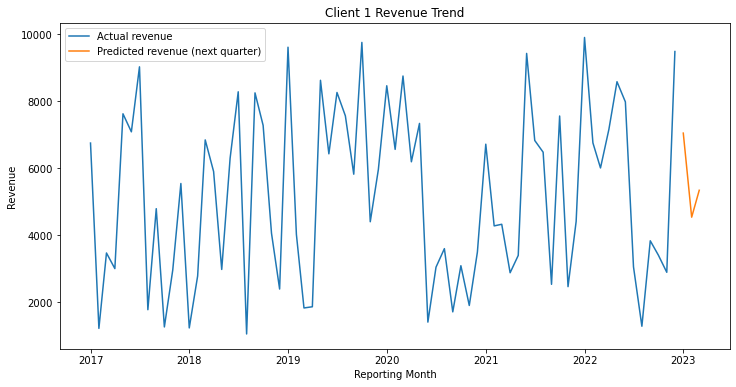

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
random.seed(42)

# Load the data
df = pd.read_csv("sample_data.csv")
df["reporting_month"] = pd.to_datetime(df["reporting_month"], format="%Y%m")

# Function to train SARIMAX model and predict next quarter revenue
def predict_next_quarter(client_data):
    client_data = client_data.set_index("reporting_month")
    model = SARIMAX(client_data["revenue"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    predictions = results.get_prediction(start=client_data.index[-1], end=client_data.index[-1] + pd.DateOffset(months=3), dynamic=True)
    return predictions.predicted_mean

# Function to plot the trend for a specific client
def plot_client_trend(client_id):
    client_data = df[df["client_id"] == client_id][["reporting_month", "revenue"]]
    predictions = predict_next_quarter(client_data)

    # Plot the trend
    plt.figure(figsize=(12, 6))
    plt.plot(client_data["reporting_month"], client_data["revenue"], label="Actual revenue")
    plt.plot(predictions.index[1:], predictions.values[1:], label="Predicted revenue (next quarter)")
    plt.xlabel("Reporting Month")
    plt.ylabel("Revenue")
    plt.title(f"Client {client_id} Revenue Trend")
    plt.legend()
    plt.show()

# Plot the trend for a specific client (e.g., client 1)
plot_client_trend(1)


In [7]:
# Function to predict next quarter revenue and calculate trend for multiple clients
def predict_trend_multiple_clients(df):
    trend_results = []

    for client_id in df["client_id"].unique():
        client_data = df[df["client_id"] == client_id][["reporting_month", "revenue"]]
        predictions = predict_next_quarter(client_data)

        # Calculate the trend indicator (percentage change)
        actual_last_month = client_data["revenue"].iloc[-1]
        predicted_next_month = predictions.values[1]
        trend_indicator = (predicted_next_month - actual_last_month) / actual_last_month * 100

        trend_results.append({
            "client_id": client_id,
            "trend_indicator": trend_indicator
        })

    return pd.DataFrame(trend_results)

# Calculate the trend indicator for all clients
trends_df = predict_trend_multiple_clients(df)
print(trends_df)


   client_id  trend_indicator
0          1       -25.663708
1          2       -12.061972
2          3       -37.542982
3          4       118.990142
4          5         2.323109
5          6        26.592824
6          7       -28.139285
7          8       -29.305986
8          9         7.075893
9         10        56.960639
